### Exploratory Data Analysis
<ul>Exploratory Data Analysis refers to the critical process of: 
<li>performing initial investigations on data</li>
<li>to discover patterns</li>
<li>to spot anomalies</li>
<li>to test hypothesis, and </li>
<li>to check assumptions </li>
with the help of summary statistics and graphical representations.
</ul>

### Univariate Analysis
"Uni" means one and "variate" means variable, so univariate analysis is analysis of 1 variable at a time.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Read data
wine_data = pd.read_csv(r'https://raw.githubusercontent.com/shekhar270779/Learn_ML/main/datasets/winequality-red.csv')
wine_data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1115,7.0,0.690,0.07,2.5,0.091,15.0,21.0,0.99572,3.38,0.60,11.3,6
1059,8.9,0.480,0.53,4.0,0.101,3.0,10.0,0.99586,3.21,0.59,12.1,7
1557,6.6,0.855,0.02,2.4,0.062,15.0,23.0,0.99627,3.54,0.60,11.0,6
932,7.6,0.400,0.29,1.9,0.078,29.0,66.0,0.99710,3.45,0.59,9.5,6
464,11.5,0.315,0.54,2.1,0.084,5.0,15.0,0.99870,2.98,0.70,9.2,6


In [4]:
df = wine_data.copy()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# replace 'space' in column names with 'underscore'
df.columns = df.columns.str.replace(" ","_")

In [9]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Measures of Central Tendency
#### Mean, Median, Mode

In [12]:
# Lets take fixed_acidity column and do its univariate analysis

# Lets calculate Arithmetic Mean or simply called as mean 
print(f"Mean value of fixed_acidity: {np.mean(df.fixed_acidity):.2f}")

# Lets calculate median
print(f"Median value of fixed_acidity: {np.median(df.fixed_acidity):.2f}")

Mean value of fixed_acidity: 8.32
Median value of fixed_acidity: 7.90


In [34]:
# Mode is most occuring value
# lets find mode of quality

print(df['quality'].value_counts());

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64


`Since quality 5 appears maximum time, so mode is 5 for Quality`

In [36]:
from scipy import stats

In [37]:
stats.mode(df.quality)

ModeResult(mode=array([5], dtype=int64), count=array([681]))

#### Geometric mean

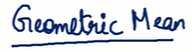

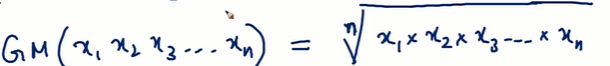

In [ ]:
Geometric mean is useful when we have to find mean of different rating systems.
Support product A has got ratings as 4.5/5 and 68/100 as per two ratings systems
Similarly product B has got ratings as 3/5 and 75/100 .
Now we need to compare two products and find which has better ratings.

In [46]:
gm_A = stats.gmean([4.5,68])
gm_B = stats.gmean([3, 75])

print(f"As per Geometric Mean,\nRating of A: {gm_A:.2f}\nRating of B: {gm_B:.2f}")

As per Geometric Mean,
Rating of A: 17.49
Rating of B: 15.00


#### Harmonic mean

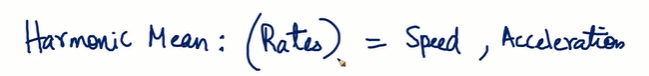

We use Harmonic mean when we are dealing with rates.
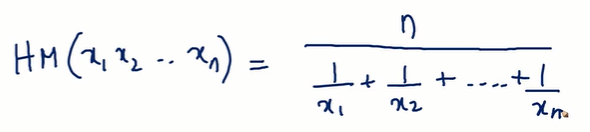

Suppose we are travelling from point A to point B (10Km distance) at speed of 5km/h and returning from B to A at speed of 30km/h. What is avg. speed?

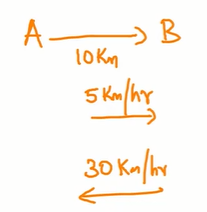

In [42]:
print(f"Harmonic Mean: {stats.hmean((5, 30)):.2f}km/h")

Harmonic Mean: 8.57km/h


### Measures of Dispersion

Dispersion represents spread of the data

#### Range: Max - Min


In [61]:
# Fixed_acidity column

print(f"Max: {df.fixed_acidity.max():.2f}\nMin: {df.fixed_acidity.min():.2f}\nRange: {df.fixed_acidity.max() - df.fixed_acidity.min():.2f}")

Max: 15.90
Min: 4.60
Range: 11.30


#### Inter Quartile Range (IQR)
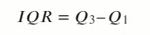

In [64]:
# Q1: 25th percentile , Q2: 50th percentile (median), Q3: 75th percentile
# IQR = Q3 - Q1 , it represents main area where data is located

print(f"IQR of fixed_acidity: {stats.iqr(df.fixed_acidity):.2f}")

IQR of fixed_acidity: 2.10


In [65]:
# we can also find 25th and 75th percentile to calculate IQR 
q1 = np.percentile(df.fixed_acidity, 25, interpolation='midpoint')
q3 = np.percentile(df.fixed_acidity, 75, interpolation='midpoint')
round(q3 - q1,2)

2.1

#### Variance
- It represents how far data points lie away from the mean.

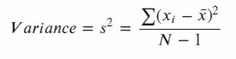

In [68]:
# method 1
print(f"Variance: {stats.tvar(df.fixed_acidity):.2f}");

Variance: 3.03


In [69]:
# method 2
print(f"Variance: {df.fixed_acidity.var():.2f}");

Variance: 3.03


In [70]:
# method 3
print(f"Variance: {np.var(df.fixed_acidity):.2f}");

Variance: 3.03


#### Standard Deviation
- It is root mean square deviation
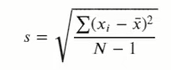

In [76]:
# method 1
print(f"Standard deviation: {stats.tstd(df.fixed_acidity):.2f}");

Standard deviation: 1.74


In [77]:
# method 2

print(f"Standard deviation: {df.fixed_acidity.std():.2f}");

Standard deviation: 1.74


In [78]:
# method 3

print(f"Standard deviation: {np.std(df.fixed_acidity):.2f}");

Standard deviation: 1.74
